<a href="https://colab.research.google.com/github/bhogasena/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Advanced Linear Regression - Ridge and Lasso**

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

*   Which variables are significant in predicting the price of a house, and
*   How well those variables describe the price of a house.


## Step 1: Reading and Understanding the Data

In [386]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import stats
import math
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pd.options.display.max_rows =100
pd.options.display.max_columns=None

In [387]:
house_df = pd.read_csv("train.csv")

In [388]:
house_df.shape

(1460, 81)

In [389]:
house_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [390]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [391]:
#update data type as catergory for categorical columns though these are numerical currently
categorical_cols=['OverallCond','MSSubClass','OverallQual']
house_df[categorical_cols] = house_df[categorical_cols].astype('category')


In [392]:
# Get Numerical and Categorical features
numerical_cols=[]
categorical_cols=[]

def getNumericAndCategorical():
  numerical_cols = list(house_df.select_dtypes(include=['int64','float64']).columns)
  categorical_cols = list(house_df.select_dtypes(include=['category','object']).columns)
  return (numerical_cols, categorical_cols)
numerical_cols,categorical_cols = getNumericAndCategorical()

## Step 2: Visualising the Data

### Quantitative Variables Univariate Analysis

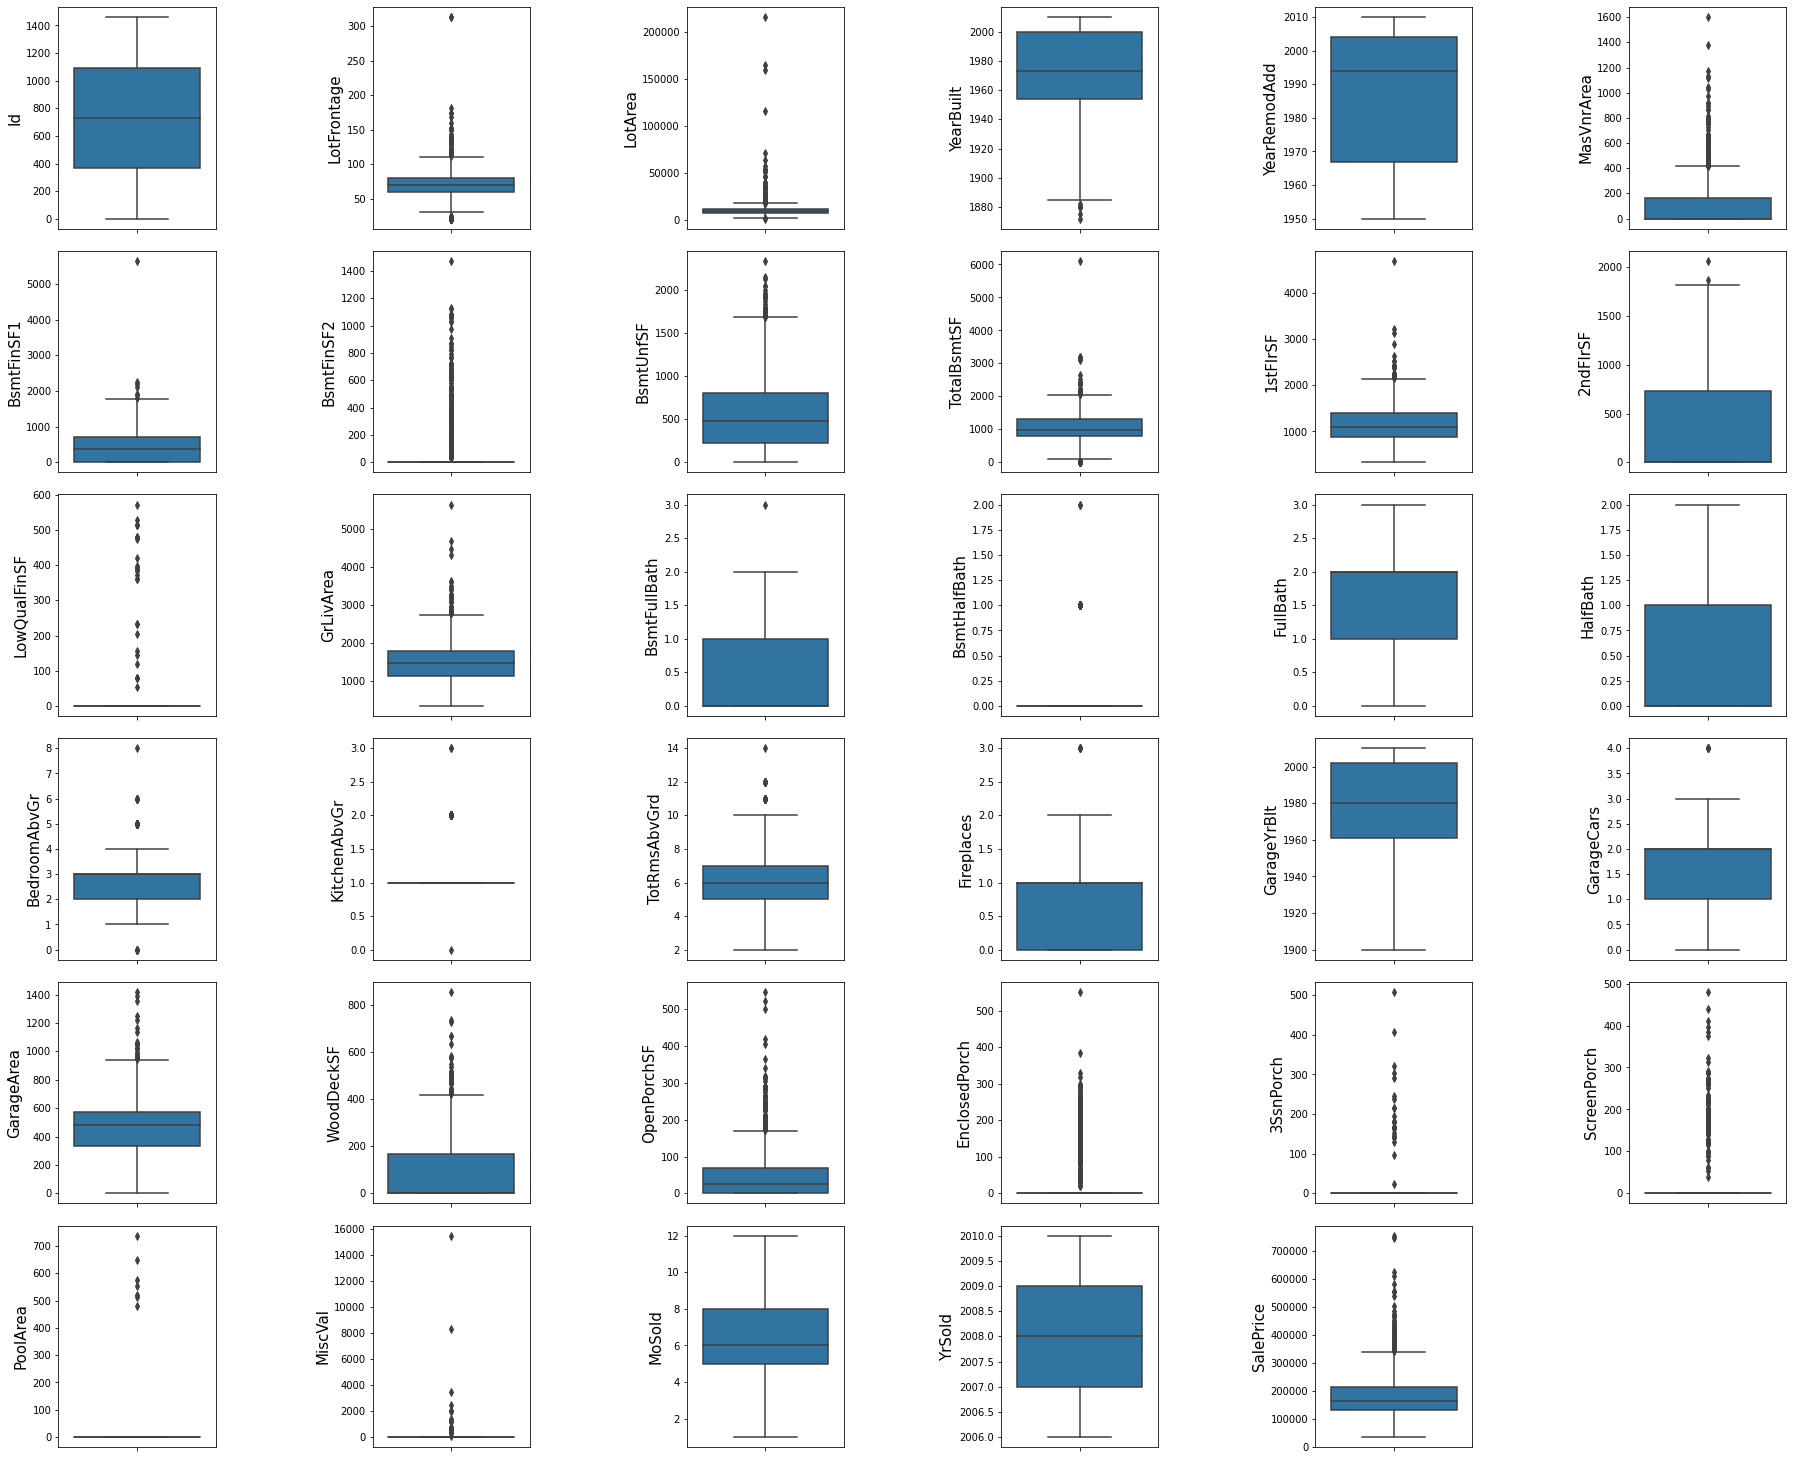

In [393]:
matplotlib.rc('ytick', labelsize=10) 
font = {'size'   : 15}

matplotlib.rc('font', **font)
def createBoxPlotsForNumericFeatures():
  fig, axes = plt.subplots(math.ceil(len(numerical_cols)/6), 6)
  col=0
  row=0
  for num_col in numerical_cols:
    sns.boxplot(data=house_df, y=num_col, ax=axes[row][col])
    col+=1
    if(col==6):
      col=0
      row+=1
  for col in range(col,6):
    axes[row, col].axis('off')

  plt.subplots_adjust(left=0,
                      bottom=0, 
                      right=4, 
                      top=5, 
                      wspace=1, 
                      hspace=0.1)
  
  plt.show()
createBoxPlotsForNumericFeatures()

### Observations
BsmtFinSF2 - As most of the houses doesn't have type1 basement SQFT so it is zero. So let's keep the data

Similary for below features houses doesn't have these options and so these values are zero. So we can't really delete these.

LowQualFinSF, BsmtHalfBath and EnclosedPorch etc.,

KitchenAbvGr - Most of the houses have one kitchen and some have more. So no need of any cleaning here.

We may need to remove some the outliers based on LotArea and MasVnrArea - during data cleaning.

### Correlation Analysis

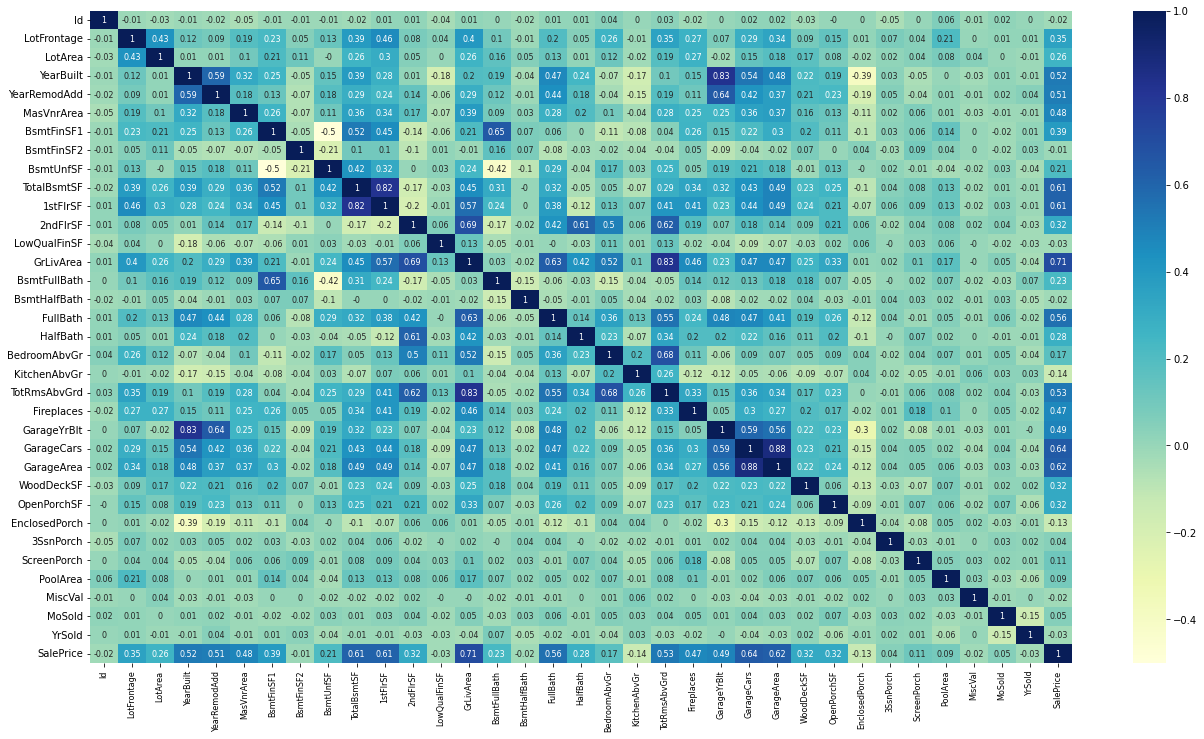

In [394]:
def plotCorrelationHeatMap():
  font = {'size'   : 8}
  matplotlib.rc('font', **font)
  plt.figure(figsize=(22,12))
  corr = round(house_df[numerical_cols].corr(),2)
  sns.heatmap(corr,annot=True,cmap="YlGnBu")
  plt.show()
plotCorrelationHeatMap()

### Bi-Variate Analysis with Quantitative features vs Target Variable

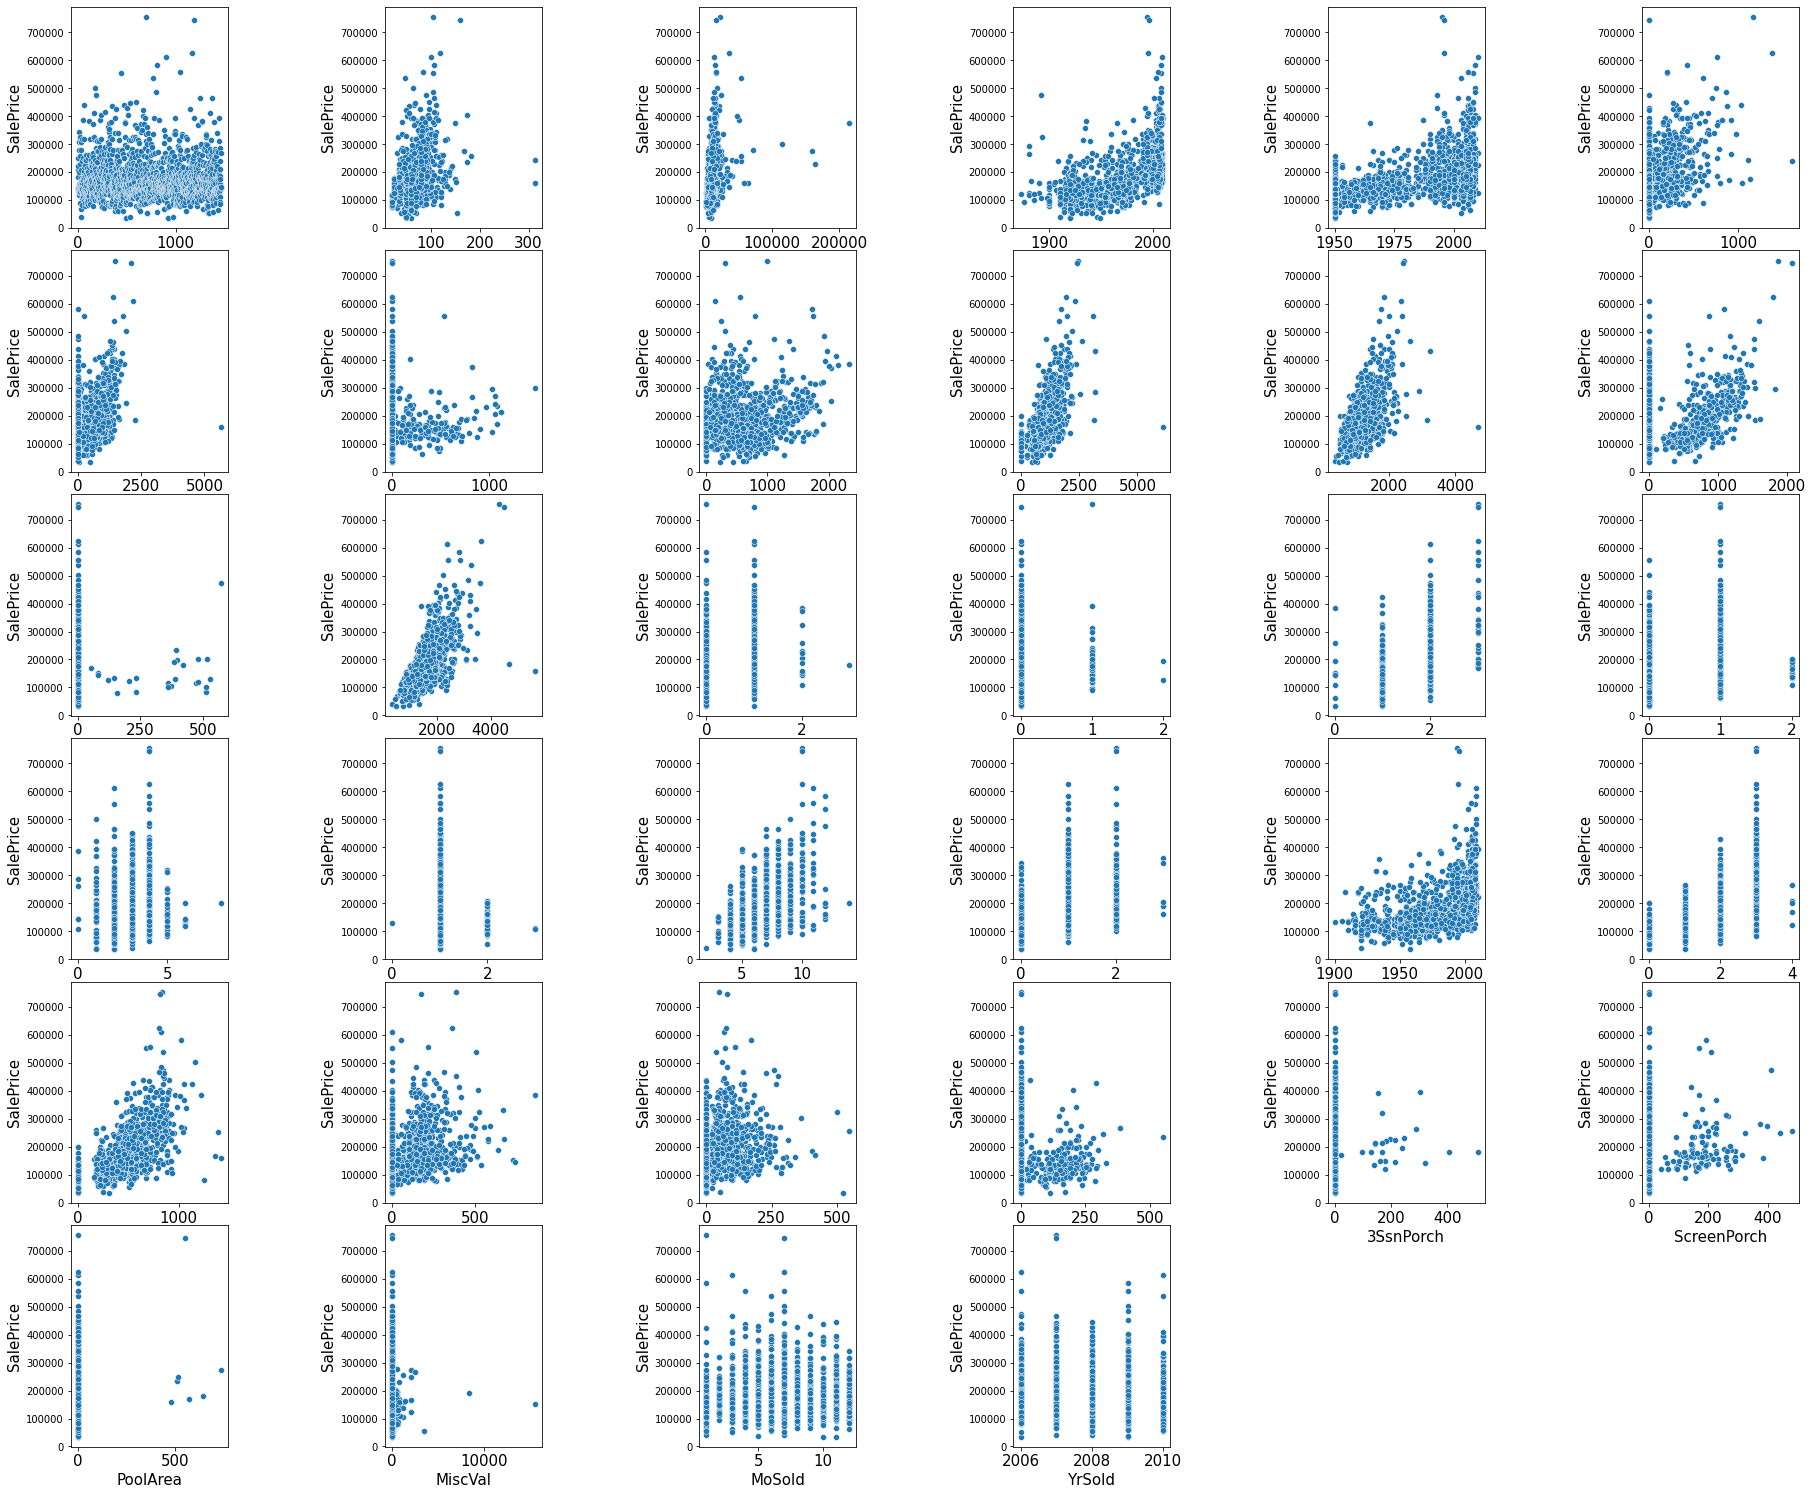

In [395]:
matplotlib.rc('ytick', labelsize=10) 
font = {'size'   : 15}

matplotlib.rc('font', **font)
def createScatterPlotsForNumericFeatures(numerical_cols):
  independent_features = numerical_cols
  independent_features.remove('SalePrice')
  fig, axes = plt.subplots(math.ceil(len(independent_features)/6), 6)
  col=0
  row=0
  for num_col in independent_features:
    sns.scatterplot(data=house_df, x=num_col,y='SalePrice', ax=axes[row][col])
    col+=1
    if(col==6):
      col=0
      row+=1
  for col in range(col,6):
    axes[row, col].axis('off')

  plt.subplots_adjust(left=0,
                      bottom=0, 
                      right=4, 
                      top=5, 
                      wspace=1, 
                      hspace=0.1)
  
  plt.show()
createScatterPlotsForNumericFeatures(numerical_cols)

### Observations


*   SalesPrice has High positive correlation with Total Basement SquareFeet,Garage cars, 1st Floor SQFT, Garage Area, GrLive Area, LotArea
*   And it has high negative correlation with Age of building and Age of remodel.

* We can also see there is high correlation among the features itself. example Ground Living area has high + correlation with total rooms above ground, 2ndflr sqft, Fullbath, bedrooms above grnd etc



### Bi-Variate Analysis with Categorical features vs Target Variable

In [396]:
def plotBoxPlotForCategorical():
  def create_hist_plot(x_var,y_var,row,col,title,bins):
    tr1 = go.Box(x=house_df[x_var],y=house_df[y_var])
    tr1.update(name=title)
    fig.add_trace(tr1,row,col)
    fig.update_xaxes(title={
          'text': title},row=row,col=col)

  fig = make_subplots(math.ceil(len(categorical_cols)/6), 6,shared_yaxes=True,vertical_spacing=0.08)

  col=1
  row=1
  for column in categorical_cols:
    create_hist_plot(column,'SalePrice',row,col,column,0)
    col+=1
    if(col==7):
      col=1
      row+=1


  fig.update_layout(width=1500,height=2000,barmode='group', bargap=0.15)
  fig.update_yaxes(title={'text':"House Price"},row=1,col=1)
  fig.show()
plotBoxPlotForCategorical()

### Observations
## Observations

*   OverAllQuality - As rating goes from 1(Bad) to 10 (Excellent) - Price is going higher.

*   ExterQual - Evaluates the quality of the material on the exterior - EX(Excellent) - has higher sale price
*   PoolQC - homes which have excellent Pool higher sale price

*   Similarly in many of Excellent categories we can see sales price is higher


## Step 3: Data Cleaning and Derive New Columns



In [397]:
# Get columns which have NaN values
house_df[house_df.loc[:,(house_df.isna().sum() > 0)].columns].isna().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [398]:
# Fill with zero for these columns as there might not be Fence, Lotfrontage etc
house_df[['MasVnrArea','LotFrontage']] = house_df[['MasVnrArea','LotFrontage']].fillna(0)

In [399]:
# Alley - NaN means No Alley
# PoolQC - NaN means no Pool
# MasVnrType - NaN - is None
# ^Bsmt - NaN - No Basement
# ^Garage - NaN - No Garage
# FireplaceQu - NaN - No Fireplace
house_df['Alley'].fillna('No Alley',inplace=True)
house_df['PoolQC'].fillna('No Pool',inplace=True)
house_df['Fence'].fillna('No Fence',inplace=True)
house_df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] = house_df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].fillna('No Basement')
house_df[['GarageType','GarageFinish','GarageQual','GarageCond']] = house_df[['GarageType','GarageFinish','GarageQual','GarageCond']].fillna('No Garage')
house_df.MasVnrType.fillna('None',inplace=True)
house_df.FireplaceQu.fillna('No Fireplace',inplace=True)

In [400]:
# As there is no information on Electrical and also one row is NaN. Lets drop that row
house_df.dropna(subset=['Electrical'],axis=0,inplace=True)

In [401]:
# drop 'MiscFeature' as it has mostly Null values
# drop 'MoSold' as no use and there is Year already
house_df.drop('GarageYrBlt',axis=1,inplace=True)
house_df.drop('MoSold',axis=1,inplace=True)

In [402]:
# GarageYrBlt - drop this column as well because there are other columns that represents the No Garage and Year built would not be significant as there is year built already
house_df.drop('MiscFeature',axis=1,inplace=True)
house_df.drop('Id',axis=1,inplace=True)

In [403]:
house_df['age'] = house_df['YrSold'] - house_df['YearBuilt']
house_df['age_remodel'] = house_df['YrSold'] - house_df['YearRemodAdd']

In [404]:
# Drop the columns 'YearBuilt', 'YrSold' and 'YearRemodAdd'
house_df.drop(columns=['YrSold','YearBuilt','YearRemodAdd'],axis=0,inplace=True)

In [405]:
# As per above EDA, LotArea has some outliers and so let's remove it using IQR range
Q1 = house_df.LotArea.quantile(0.1)
Q3 = house_df.LotArea.quantile(0.9)
IQR = Q3-Q1
house_df = house_df[(house_df['LotArea'] <= (Q3 + 1.5*IQR))&(house_df['LotArea'] >= (Q1 - 1.5*IQR))]

# Remove MasVnrArea outliers

Q1 = house_df.MasVnrArea.quantile(0.1)
Q3 = house_df.MasVnrArea.quantile(0.9)
IQR = Q3-Q1
house_df = house_df[(house_df['MasVnrArea'] <= (Q3 + 1.5*IQR))&(house_df['MasVnrArea'] >= (Q1 - 1.5*IQR))]



In [406]:
house_df.shape

(1422, 76)

## Step 3: Data Preparation



In [407]:
#object_cols = house_df.select_dtypes(include=['object']).columns
#house_df[object_cols] = house_df[object_cols].astype('category')
numerical_cols,categorical_cols = getNumericAndCategorical()
#house_df[categorical_cols] = house_df[categorical_cols] .astype('str')

In [408]:
# Split train and test data
np.random.seed(1)
house_train_df, house_test_df = train_test_split(house_df,train_size=0.7, test_size=0.3, random_state=100)

In [409]:
house_df[numerical_cols].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0          856       856       854             0       1710             1   
1         1262      1262         0             0       1262             0   
2          920       920       866             0       1786             1   
3          756       961       756             0       1717             1   
4         1145      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0           0           2         548           0           61              0   
1           1           2         460         298            0              0   
2           1           2         608           0           42              0   
3           1           3         642           0           35            272   
4           1           3         836         192           84              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice  age  age_remodel  
0          0            0         0        0     208500    5            5  
1          0            0         0        0     181500   31           31  
2          0            0         0        0     223500    7            6  
3          0            0         0        0     140000   91           36  
4          0            0         0        0     250000    8            8

In [410]:
house_df[categorical_cols].head()

MSSubClass MSZoning Street     Alley LotShape LandContour Utilities  \
0         60       RL   Pave  No Alley      Reg         Lvl    AllPub   
1         20       RL   Pave  No Alley      Reg         Lvl    AllPub   
2         60       RL   Pave  No Alley      IR1         Lvl    AllPub   
3         70       RL   Pave  No Alley      IR1         Lvl    AllPub   
4         60       RL   Pave  No Alley      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

  OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0           7           5     Gable  CompShg     VinylSd     VinylSd   
1           6           8     Gable  CompShg     MetalSd     MetalSd   
2           7           5     Gable  CompShg     VinylSd     VinylSd   
3           7           5     Gable  CompShg     Wd Sdng     Wd Shng   
4           8           5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    BrkFace        Gd        TA      PConc       Gd       TA           No   
1       None        TA        TA     CBlock       Gd       TA           Gd   
2    BrkFace        Gd        TA      PConc       Gd       TA           Mn   
3       None        TA        TA     BrkTil       TA       Gd           No   
4    BrkFace        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
0          GLQ          Unf    GasA        Ex          Y      SBrkr   
1          ALQ          Unf    GasA        Ex          Y      SBrkr   
2          GLQ          Unf    GasA        Ex          Y      SBrkr   
3          ALQ          Unf    GasA        Gd          Y      SBrkr   
4          GLQ          Unf    GasA        Ex          Y      SBrkr   

  KitchenQual Functional   FireplaceQu GarageType GarageFinish GarageQual  \
0          Gd        Typ  No Fireplace     Attchd          RFn         TA   
1          TA        Typ            TA     Attchd          RFn         TA   
2          Gd        Typ            TA     Attchd          RFn         TA   
3          Gd        Typ            Gd     Detchd          Unf         TA   
4          Gd        Typ            TA     Attchd          RFn         TA   

  GarageCond PavedDrive   PoolQC     Fence SaleType SaleCondition  
0         TA          Y  No Pool  No Fence       WD        Normal  
1         TA          Y  No Pool  No Fence       WD        Normal  
2         TA          Y  No Pool  No Fence       WD        Normal  
3         TA          Y  No Pool  No Fence       WD       Abnorml  
4         TA          Y  No Pool  No Fence       WD        Normal

#### Data Pre-Processing
1) Let's scale the continuous numerical variables using MinMaxScalar - scaling helps to converge the faster and also will not lead to mis-interpretations due to high magnitudes.

2) Use one-hot encode for categorical features.

We are using here ColumnTransformer pipeline to do this.

In [411]:
preprocess_pipeline = ColumnTransformer([
                                         ('numericaltransformer',MinMaxScaler(),numerical_cols),
                                         ('categorical',OneHotEncoder(drop='first',dtype=np.int64,sparse=True,handle_unknown='ignore'),categorical_cols)

                                         
],remainder='passthrough')
house_train_ndarray = preprocess_pipeline.fit_transform(house_train_df)

In [412]:
house_train_df = pd.DataFrame.sparse.from_spmatrix(house_train_ndarray,columns=preprocess_pipeline.get_feature_names_out())

In [413]:
house_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Columns: 268 entries, numericaltransformer__LotFrontage to categorical__SaleCondition_Partial
dtypes: Sparse[float64, 0](268)
memory usage: 665.6 KB


## Step 4: Model Building and Evaluation


Ridge Regression

In [414]:
X_cols = list(house_train_df.columns)

In [415]:
print(len(X_cols))

268


In [416]:
print(X_cols.remove('numericaltransformer__SalePrice'))

None


In [417]:
print(len(X_cols))

267


In [418]:
#Create Folds
folds = KFold(n_splits=5, shuffle=True, random_state=1)

#Set Hyper parameters for tuning
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,2.5, 3.0, 
 3.5,4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

ridge_model = GridSearchCV(estimator=ridge,
                           param_grid=params,
                           scoring='r2',
                           cv=folds,
                           return_train_score=True)
y_train = house_train_df['numericaltransformer__SalePrice']
X_train = house_train_df[X_cols]

ridge_model.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 2.5,
                                   3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='r2')

In [419]:
# Check the best parameters
print(ridge_model.best_params_)
print(ridge_model.best_score_)

{'alpha': 3.0}
0.9020343048485557


In [420]:
ridge_results = pd.DataFrame(ridge_model.cv_results_)
ridge_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.082009      0.005100         0.009997        0.000022      0.0001   
1        0.141507      0.122238         0.011348        0.002100       0.001   
2        0.079027      0.002891         0.010598        0.000800        0.01   
3        0.076825      0.001526         0.010345        0.000743        0.05   
4        0.124289      0.097086         0.011015        0.000898         0.1   
5        0.075588      0.001019         0.010594        0.001343         0.2   
6        0.076436      0.005935         0.009975        0.000861         0.3   
7        0.081514      0.003901         0.057307        0.092491         0.4   
8        0.077214      0.008619         0.011632        0.004284         0.5   
9        0.121294      0.093723         0.010152        0.000579         0.6   
10       0.074467      0.000784         0.010660        0.001128         0.7   
11       0.070224      0.002328         0.009788        0.000735         0.8   
12       0.129791      0.095569         0.011162        0.000923         0.9   
13       0.069022      0.001890         0.009807        0.000732         1.0   
14       0.066616      0.000543         0.009616        0.000502         2.0   
15       0.113003      0.088054         0.010518        0.001367         2.5   
16       0.067052      0.000581         0.009369        0.000519         3.0   
17       0.086957      0.030712         0.063580        0.102647         3.5   
18       0.166435      0.063079         0.028010        0.012812         4.0   
19       0.141000      0.028011         0.019976        0.006189         5.0   
20       0.217235      0.152502         0.021581        0.006640         6.0   
21       0.144788      0.029636         0.023854        0.012004         7.0   
22       0.130826      0.027748         0.018018        0.001905         8.0   
23       0.189788      0.148885         0.018173        0.002907         9.0   
24       0.129578      0.013462         0.018401        0.001855        10.0   
25       0.156543      0.110325         0.015432        0.003240          20   
26       0.136422      0.013414         0.018795        0.002927          50   
27       0.143722      0.023695         0.021838        0.004845         100   
28       0.135073      0.032840         0.087331        0.141662         500   
29       0.133403      0.023664         0.021256        0.007501        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}           0.882939           0.893864   
1    {'alpha': 0.001}           0.883067           0.894282   
2     {'alpha': 0.01}           0.884231           0.894761   
3     {'alpha': 0.05}           0.886836           0.896906   
4      {'alpha': 0.1}           0.889847           0.899418   
5      {'alpha': 0.2}           0.894973           0.901445   
6      {'alpha': 0.3}           0.898950           0.902229   
7      {'alpha': 0.4}           0.901087           0.903404   
8      {'alpha': 0.5}           0.903317           0.904007   
9      {'alpha': 0.6}           0.905232           0.904205   
10     {'alpha': 0.7}           0.906490           0.904594   
11     {'alpha': 0.8}           0.908231           0.904682   
12     {'alpha': 0.9}           0.909389           0.905004   
13     {'alpha': 1.0}           0.910748           0.905277   
14     {'alpha': 2.0}           0.916723           0.906292   
15     {'alpha': 2.5}           0.917970           0.906279   
16     {'alpha': 3.0}           0.918939           0.906065   
17     {'alpha': 3.5}           0.919626           0.905735   
18     {'alpha': 4.0}           0.920142           0.905451   
19     {'alpha': 5.0}           0.920588           0.904347   
20     {'alpha': 6.0}           0.920797           0.903295   
21     {'alpha': 7.0}           0.920710           0.901918   
22     {'alpha': 8.0}           0.920520           0.900612   
23     {'al

In [421]:
fig = px.line(ridge_results,x='param_alpha',y=['mean_train_score','mean_test_score'])

fig.show()

#### Observations
. From above GridSearch -Best Params and Plots optimal alpha for Ridge estimator is 3.0

#### Build a Ridge Model with Optimal Alpha 3.0

In [422]:
ridge_model = Ridge(alpha=3)
ridge_model.fit(X_train,y_train)

Ridge(alpha=3)

In [423]:
def getModelEquation(type, intercept, features, coeff):
    feature_coeff = list(zip(features, coeff))
    feature_coeff.sort(key=lambda x:x[1], reverse=True)
    house_pred_equa=type+' House Prediction='+str(intercept)+'+'
    for feature, coeff in feature_coeff:
        house_pred_equa+="("+str(coeff)+"*"+feature.split('__')[1]+')+'
    return house_pred_equa

In [424]:
def getTop10SignificantFeatures(features, coeff):
    feature_coeff = pd.DataFrame(list(zip(features , coeff)), columns=['features','coefficient'])
    feature_coeff.features = feature_coeff.features.apply(lambda x: x.split('__')[1])
    feature_coeff=feature_coeff.sort_values(by='coefficient',ascending=False)
    return (feature_coeff[0:10],feature_coeff[0:10].to_html())


In [425]:
# Ridge Model House Prediction Equation
print(getModelEquation('Ridge',ridge_model.intercept_,ridge_model.feature_names_in_ , ridge_model.coef_).rstrip('+'))

Ridge House Prediction=0.07480431924759082+(0.10404616314486437*GrLivArea)+(0.08720493084131742*1stFlrSF)+(0.08359506497163098*OverallQual_10)+(0.07692710983346697*TotalBsmtSF)+(0.06875584114108187*BsmtFinSF1)+(0.05542322056104642*Neighborhood_StoneBr)+(0.05120378402127232*OverallQual_9)+(0.048253684359823724*2ndFlrSF)+(0.04370651989069078*TotRmsAbvGrd)+(0.04091600315253412*FullBath)+(0.03900026850382121*GarageArea)+(0.03695488333712976*LotArea)+(0.0351832070783592*Neighborhood_NoRidge)+(0.03465488304065282*BsmtExposure_Gd)+(0.031679573309897825*SaleType_New)+(0.031554701042828044*OverallCond_9)+(0.031366015335665964*Neighborhood_Crawfor)+(0.029323294377280835*RoofMatl_WdShngl)+(0.029082837634526956*BsmtUnfSF)+(0.02683370258807639*MasVnrArea)+(0.025832002888768857*Exterior1st_BrkFace)+(0.024896009923286565*Neighborhood_NridgHt)+(0.024889449056408202*BsmtFinSF2)+(0.024861161511344494*ScreenPorch)+(0.024538688243516356*GarageCars)+(0.021829812148927992*Functional_Typ)+(0.0214581245022387

In [426]:
# Ridge Model - House Prediction Top 10 Significant features and their coefficients
print(getTop10SignificantFeatures(ridge_model.feature_names_in_ , ridge_model.coef_)[0])

                 features  coefficient
10              GrLivArea     0.104046
7                1stFlrSF     0.087205
119        OverallQual_10     0.083595
6             TotalBsmtSF     0.076927
3              BsmtFinSF1     0.068756
85   Neighborhood_StoneBr     0.055423
118         OverallQual_9     0.051204
8                2ndFlrSF     0.048254
17           TotRmsAbvGrd     0.043707
13               FullBath     0.040916


####  Observations

- As inline with our EDA, the top most significant features are GrLivArea, 1stFlrSF, OverallQual_10, TotalBsmtSF, BsmtFinSF1, Neighborhood_StoneBr, OverallQual_9, 2ndFlrSF, TotRmsAbvGrd, FullBath, GarageArea, LotArea.
- As per the above coefficients, 10% of variance in house predictions are described by GrLiveArea, 8% is described by 1stFlrSf and go on as per coefficients.

### Analyse Error Terms

In [427]:
y_pred = ridge_model.predict(X_train)
residuals = y_train - y_pred
train_rscore = r2_score(y_train,y_pred)
print(f"Train R-Square is {train_rscore}")

Train R-Square is 0.9418370108281637


In [428]:
fig = px.histogram(residuals)
fig.update_xaxes(title='residuals')
fig.show()

#### Observations

Residuals are normally distributed

In [429]:
fig = px.scatter(y_pred,residuals)
fig.update_xaxes(title='Predictions')
fig.update_yaxes(title='Residuals')
fig.show()

#### Observations

There is no any patterns on error terms and also variance seems pretty constant except at right some couple of points

## Model Evaluation on Test data

In [430]:
house_test_ndarray = preprocess_pipeline.transform(house_test_df)

c:\Users\bhkalaka\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning:

Found unknown categories in columns [11, 17, 18, 19, 30, 34, 39, 41] during transform. These unknown categories will be encoded as all zeros



In [431]:
house_test_df = pd.DataFrame.sparse.from_spmatrix(house_test_ndarray,columns=preprocess_pipeline.get_feature_names_out())

In [432]:
y_test = house_test_df['numericaltransformer__SalePrice']
X_test = house_test_df[X_cols]

In [433]:
y_pred = ridge_model.predict(X_test)

In [434]:
r2_score(y_test, y_pred)

0.8871195014173884

##### Observations

Our Model Train R-Square is 0.9418370108281637

Test R-Square is 0.8871195014173884

## Lasso Regression

In [435]:
params = {'alpha': [0.0001, 0.0005, 0.00075, 0.0009,0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,2.5, 3.0, 
 3.5,4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0 ]}
def buildAndGetLassoModelResults(params):
    lasso = Lasso()
    lasso_model = GridSearchCV(estimator=lasso,
                            param_grid=params,
                            cv=folds,
                            scoring='r2',
                            return_train_score=True
    )

    lasso_model.fit(X_train,y_train)
    lasso_results = pd.DataFrame(lasso_model.cv_results_)
    return (lasso_model.best_params_,lasso_model.best_score_,lasso_results)
alpha, rscore, lassoresults = buildAndGetLassoModelResults(params)


In [436]:
#print best alpha and r-score
print('alpha:',alpha)
print('r-score:' ,rscore)

alpha: {'alpha': 0.0001}
r-score: 0.9059909553091844


In [437]:
fig = px.line(lassoresults,x='param_alpha',y=['mean_train_score','mean_test_score'])
fig.show()

#### Observations
As R-Score is less than 0 for Alpha > 0.05 as per above graph, lets try to change Alpha params and rebuild model to see if we can get model better than this alpha

In [438]:
params={'alpha':[0.0001,0.0002,0.0003,0.0005,0.0006,0.0007,0.0009, 0.001, 0.002, 
.003, 0.004, 0.006, 0.008, 0.01, 0.02, 0.03,0.04]}
alpha, rscore, lassoresults = buildAndGetLassoModelResults(params)

In [439]:
#print best alpha and r-score
print('alpha:',alpha)
print('r-score:' ,rscore)

alpha: {'alpha': 0.0001}
r-score: 0.9059909553091844


In [440]:
fig = px.line(lassoresults,x='param_alpha',y=['mean_train_score','mean_test_score'])
fig.show()

#### Observation

Even with this we got best alpha param as 0.0001

### Build Lasso Model with Final Best Alpha 0.0001

In [441]:
lasso_model = Lasso(alpha=0.0001)
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.0001)

In [442]:
y_train_pred = lasso_model.predict(X_train)

In [443]:
print('Lasso Model Train R-Score:',r2_score(y_train,y_train_pred))

Lasso Model Train R-Score: 0.9389097630659851


Residual Analysis

In [444]:
residuals = y_train - y_train_pred

In [445]:
fig = px.histogram(residuals)
fig.update_xaxes(title='residuals')
fig.show()

In [446]:
fig = px.scatter(y_train_pred,residuals)
fig.update_xaxes(title='Predictions')
fig.update_yaxes(title='Residuals')
fig.show()

#### Observations

Error terms are normally distributed and have constant variance and no patterns observed

#### Model Evaluation

In [447]:
y_test_pred = lasso_model.predict(X_test)

In [448]:
r_score_test = r2_score(y_test,y_test_pred)

In [449]:
print("Lasso Model R-Score:", r_score_test)

Lasso Model R-Score: 0.9039457744044916


In [450]:
print(getModelEquation('Lasso',lasso_model.intercept_,lasso_model.feature_names_in_ , lasso_model.coef_).rstrip('+'))

Lasso House Prediction=0.05900813834244645+(0.2632724692311189*GrLivArea)+(0.16666417020455784*OverallQual_10)+(0.12351539710731231*TotalBsmtSF)+(0.09640946579617095*OverallQual_9)+(0.05745564849358567*Neighborhood_StoneBr)+(0.04416633006261745*SaleType_New)+(0.04225118849825629*OverallCond_9)+(0.041146192816151325*BsmtFinSF1)+(0.04079538718630272*Neighborhood_Crawfor)+(0.038131711353769804*OverallQual_8)+(0.035241592677086576*BsmtExposure_Gd)+(0.03371217167345714*Neighborhood_NoRidge)+(0.03230266331749002*Exterior1st_BrkFace)+(0.03149448992608275*GarageArea)+(0.030806697124816013*LotArea)+(0.027248325155860783*MasVnrArea)+(0.0256567107512877*Neighborhood_NridgHt)+(0.025634611324281346*OverallCond_8)+(0.024937453144210798*FullBath)+(0.02429155731987848*Functional_Typ)+(0.02357198000949339*OverallCond_7)+(0.019758714750860492*1stFlrSF)+(0.018321388917936794*TotRmsAbvGrd)+(0.017237192034560374*ScreenPorch)+(0.014873641829585173*Neighborhood_Somerst)+(0.014458346589586939*Fireplaces)+(0.0

In [451]:
print(getTop10SignificantFeatures(lasso_model.feature_names_in_,lasso_model.coef_)[0])

                 features  coefficient
10              GrLivArea     0.263272
119        OverallQual_10     0.166664
6             TotalBsmtSF     0.123515
118         OverallQual_9     0.096409
85   Neighborhood_StoneBr     0.057456
259          SaleType_New     0.044166
127         OverallCond_9     0.042251
3              BsmtFinSF1     0.041146
69   Neighborhood_Crawfor     0.040795
117         OverallQual_8     0.038132


#### Final Observations

- Ridge model optimal lamda value : 3
- Lasso Model optimal lamda value: 0.0001
- Ridge Model Train R-Score is : 0.9418370108281637 and Test R-score is 0.8871195014173884
- Lasso Model Train R-Score is 0.9389097630659851 and Test R-score is 0.9039457744044916
- So Lasso Model is performing better than Ridge for this prediction.
- Ridge Model Top 10 Significant variables are as below.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>features</th>
      <th>coefficient</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>10</th>
      <td>GrLivArea</td>
      <td>0.104046</td>
    </tr>
    <tr>
      <th>7</th>
      <td>1stFlrSF</td>
      <td>0.087205</td>
    </tr>
    <tr>
      <th>119</th>
      <td>OverallQual_10</td>
      <td>0.083595</td>
    </tr>
    <tr>
      <th>6</th>
      <td>TotalBsmtSF</td>
      <td>0.076927</td>
    </tr>
    <tr>
      <th>3</th>
      <td>BsmtFinSF1</td>
      <td>0.068756</td>
    </tr>
    <tr>
      <th>85</th>
      <td>Neighborhood_StoneBr</td>
      <td>0.055423</td>
    </tr>
    <tr>
      <th>118</th>
      <td>OverallQual_9</td>
      <td>0.051204</td>
    </tr>
    <tr>
      <th>8</th>
      <td>2ndFlrSF</td>
      <td>0.048254</td>
    </tr>
    <tr>
      <th>17</th>
      <td>TotRmsAbvGrd</td>
      <td>0.043707</td>
    </tr>
    <tr>
      <th>13</th>
      <td>FullBath</td>
      <td>0.040916</td>
    </tr>
  </tbody>
</table>


1. 10% of variance is house predicton can be described by GrLiveArea, 8% by 1stFlrSf, 8% by OverallQual_10 etc..


- Lasso Model Top 10 Significant variables are as below.
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>features</th>
      <th>coefficient</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>10</th>
      <td>GrLivArea</td>
      <td>0.263272</td>
    </tr>
    <tr>
      <th>119</th>
      <td>OverallQual_10</td>
      <td>0.166664</td>
    </tr>
    <tr>
      <th>6</th>
      <td>TotalBsmtSF</td>
      <td>0.123515</td>
    </tr>
    <tr>
      <th>118</th>
      <td>OverallQual_9</td>
      <td>0.096409</td>
    </tr>
    <tr>
      <th>85</th>
      <td>Neighborhood_StoneBr</td>
      <td>0.057456</td>
    </tr>
    <tr>
      <th>259</th>
      <td>SaleType_New</td>
      <td>0.044166</td>
    </tr>
    <tr>
      <th>127</th>
      <td>OverallCond_9</td>
      <td>0.042251</td>
    </tr>
    <tr>
      <th>3</th>
      <td>BsmtFinSF1</td>
      <td>0.041146</td>
    </tr>
    <tr>
      <th>69</th>
      <td>Neighborhood_Crawfor</td>
      <td>0.040795</td>
    </tr>
    <tr>
      <th>117</th>
      <td>OverallQual_8</td>
      <td>0.038132</td>
    </tr>
  </tbody>
</table>

- More or less Top 10 Significant variables are same for both Ridge and Lasso Model though there are co-efficients changes.

- Ridge Model Equation:
Ridge House Prediction= 0.07480431924759082+(0.10404616314486437*GrLivArea)+(0.08720493084131742*1stFlrSF)+(0.08359506497163098*OverallQual_10)+(0.07692710983346697*TotalBsmtSF)+(0.06875584114108187*BsmtFinSF1)+(0.05542322056104642*Neighborhood_StoneBr)+(0.05120378402127232*OverallQual_9)+(0.048253684359823724*2ndFlrSF)+(0.04370651989069078*TotRmsAbvGrd)+(0.04091600315253412*FullBath)+(0.03900026850382121*GarageArea)+(0.03695488333712976*LotArea)+(0.0351832070783592*Neighborhood_NoRidge)+(0.03465488304065282*BsmtExposure_Gd)+(0.031679573309897825*SaleType_New)+(0.031554701042828044*OverallCond_9)+(0.031366015335665964*Neighborhood_Crawfor)+(0.029323294377280835*RoofMatl_WdShngl)+(0.029082837634526956*BsmtUnfSF)+(0.02683370258807639*MasVnrArea)+(0.025832002888768857*Exterior1st_BrkFace)+(0.024896009923286565*Neighborhood_NridgHt)+(0.024889449056408202*BsmtFinSF2)+(0.024861161511344494*ScreenPorch)+(0.024538688243516356*GarageCars)+(0.021829812148927992*Functional_Typ)+(0.021458124502238714*HalfBath)+(0.017678157664673216*Fireplaces)+(0.01752988988937907*SaleCondition_Alloca)+(0.017114300077739623*LotShape_IR2)+(0.016648324885444914*SaleCondition_AdjLand)+(0.01640612219551007*MSZoning_RL)+(0.01634249153974598*OverallCond_8)+(0.0155992158088284*OverallCond_7)+(0.015439463857028593*OpenPorchSF)+(0.014476193624135976*SaleCondition_Normal)+(0.013793745542272374*Exterior2nd_Wd Sdng)+(0.01347012430441602*SaleType_Con)+(0.013395268859885333*BsmtCond_TA)+(0.013025459033340158*MSSubClass_40)+(0.012932387228146944*Condition1_Norm)+(0.012882350546157289*GarageType_BuiltIn)+(0.012864531116325404*Condition1_PosA)+(0.011886837264371335*BsmtFullBath)+(0.011886458472731145*MSZoning_RH)+(0.01168931087125867*RoofMatl_WdShake)+(0.011034985549058943*BsmtFinType1_GLQ)+(0.011012040676447213*MSZoning_RM)+(0.010897175724604137*MSZoning_FV)+(0.010772077954695458*OverallQual_8)+(0.010715484050381177*MasVnrType_Stone)+(0.010584275178680835*LandSlope_Mod)+(0.010372977091317782*LotShape_IR3)+(0.010270502451754622*Neighborhood_NPkVill)+(0.01026678883064415*MSSubClass_75)+(0.010224756148630398*LotConfig_CulDSac)+(0.010161636608067758*3SsnPorch)+(0.010036477879678075*EnclosedPorch)+(0.0099548404874399*LandContour_HLS)+(0.009569682284760463*Neighborhood_BrDale)+(0.00934188144043844*PoolQC_No Pool)+(0.009281219744017135*MSSubClass_70)+(0.009117615380345626*GarageCond_TA)+(0.00898099488263163*Neighborhood_Somerst)+(0.00877916671470089*Exterior1st_Stucco)+(0.008493102916735095*Alley_Pave)+(0.007929606004335671*WoodDeckSF)+(0.007834799539533402*HouseStyle_1.5Unf)+(0.007755897313662834*CentralAir_Y)+(0.0076511819749543915*Condition1_RRAn)+(0.007631811506978175*LandContour_Lvl)+(0.007583556320312855*Exterior2nd_CmentBd)+(0.007375126619506636*MSSubClass_50)+(0.007050842469599511*Exterior2nd_BrkFace)+(0.0064975800613658805*RoofStyle_Mansard)+(0.006469950372970278*Condition2_Norm)+(0.0062980504271395316*RoofStyle_Shed)+(0.006268310928228935*Street_Pave)+(0.006262075896484653*SaleCondition_Partial)+(0.00625824133359808*BsmtCond_Gd)+(0.0061675439242534005*MSSubClass_60)+(0.006042897191023645*PavedDrive_Y)+(0.005991065858992245*SaleCondition_Family)+(0.005574930279240322*Exterior2nd_VinylSd)+(0.00511883057536903*Condition2_PosA)+(0.005100846837792546*Heating_GasA)+(0.004733219197823782*Foundation_PConc)+(0.004087411138361422*Exterior2nd_Brk Cmn)+(0.004073060578575639*Fence_GdWo)+(0.003798182823143384*LotShape_Reg)+(0.003769349719591462*Heating_Grav)+(0.0037203047177225266*Neighborhood_Veenker)+(0.003662814451537935*GarageType_Detchd)+(0.003659286393727257*Electrical_FuseF)+(0.003555591306253379*Exterior1st_BrkComm)+(0.0033431481435191126*OverallCond_6)+(0.00326794667166471*RoofStyle_Hip)+(0.00317593870499822*Electrical_FuseP)+(0.00286936449120362*Heating_Wall)+(0.002783602241423944*GarageType_Attchd)+(0.002705684068859354*Exterior2nd_Stone)+(0.002551425991804018*RoofStyle_Gambrel)+(0.002497094870317395*MSSubClass_45)+(0.002357702838483562*Exterior1st_Stone)+(0.002323132656885837*Condition2_Feedr)+(0.0019010937912407957*Neighborhood_SawyerW)+(0.0018274402009679862*HouseStyle_SFoyer)+(0.0017373325641239633*HouseStyle_2.5Fin)+(0.0017099410731023605*BsmtFinType1_BLQ)+(0.001643343407045223*Electrical_Mix)+(0.0016418447941651897*Condition1_Feedr)+(0.0016258113132805267*Foundation_Slab)+(0.0016181428822687556*GarageType_No Garage)+(0.0016181428822687556*GarageFinish_No Garage)+(0.0016181428822687556*GarageQual_No Garage)+(0.0016181428822687556*GarageCond_No Garage)+(0.0015954265597643946*SaleType_ConLw)+(0.0014815053192688474*Neighborhood_Blueste)+(0.001419947573685617*FireplaceQu_Po)+(0.0014010730193227535*MSSubClass_30)+(0.001293647973323849*MiscVal)+(0.0012581934020927878*Alley_No Alley)+(0.0012110039607145487*SaleType_ConLI)+(0.0011553193707557227*LotConfig_Inside)+(0.0010979375088246254*FireplaceQu_Gd)+(0.001015505333916165*GarageFinish_Unf)+(0.000963059642185397*LowQualFinSF)+(0.0008685039305468341*SaleType_CWD)+(0.0008239086430133777*Condition1_RRNn)+(0.0006458557440209009*Fence_MnPrv)+(0.000619005574985972*BsmtQual_No Basement)+(0.000619005574985972*BsmtCond_No Basement)+(0.000619005574985972*BsmtFinType1_No Basement)+(0.000495059553014287*FireplaceQu_TA)+(0.000465558151296638*GarageFinish_RFn)+(0.00031249029476341063*Functional_Maj2)+(0.0002675361055485225*ExterCond_Fa)+(0.00017927502647975476*Exterior1st_MetalSd)+(-4.641776331885596e-06*Electrical_SBrkr)+(-0.00014664698653844334*Exterior1st_Plywood)+(-0.0002536090821452637*BsmtFinType2_GLQ)+(-0.00041672982254352533*ExterCond_TA)+(-0.0005216512370902758*SaleType_Oth)+(-0.0007490347462398805*HeatingQC_Fa)+(-0.0008399953516897059*Functional_Min2)+(-0.0010637098610061894*Foundation_CBlock)+(-0.001065321317689153*Exterior2nd_HdBoard)+(-0.0011511390468201556*Exterior2nd_MetalSd)+(-0.001312461409221694*HouseStyle_1Story)+(-0.0014643354000113526*Exterior1st_ImStucc)+(-0.0014775173455489716*Functional_Min1)+(-0.0016627386301890478*FireplaceQu_No Fireplace)+(-0.0018270317932708726*BsmtFinType1_Unf)+(-0.0018279232332536952*BsmtFinType1_Rec)+(-0.00214164315716488*MasVnrType_None)+(-0.002198187782572664*Exterior2nd_Stucco)+(-0.0022877857789771754*Exterior2nd_ImStucc)+(-0.002459643304308591*HouseStyle_SLvl)+(-0.002770497857202761*GarageType_CarPort)+(-0.002904831027041016*RoofStyle_Gable)+(-0.002930329151353916*SaleType_ConLD)+(-0.002996102278241059*Fence_No Fence)+(-0.0031393960221539146*MSSubClass_80)+(-0.003254405709744604*ExterCond_Po)+(-0.0032903366620468098*MasVnrType_BrkFace)+(-0.003306469594260045*BsmtExposure_Mn)+(-0.003441042642831908*HouseStyle_2Story)+(-0.0035459106053512294*Neighborhood_ClearCr)+(-0.003615834479611943*Exterior2nd_Plywood)+(-0.003737495024683359*Neighborhood_BrkSide)+(-0.0038356999195944333*Exterior1st_CemntBd)+(-0.003836397029613263*Condition1_RRNe)+(-0.003860842820365147*BldgType_2fmCon)+(-0.0038770420370744228*HeatingQC_TA)+(-0.004096387767048996*Heating_GasW)+(-0.004221755186049092*GarageCond_Po)+(-0.004369929631331963*PavedDrive_P)+(-0.00439920393595421*BsmtExposure_No Basement)+(-0.0044645905218411025*Exterior1st_CBlock)+(-0.0044645905218411025*Exterior2nd_CBlock)+(-0.00462380740407264*ExterCond_Gd)+(-0.004629601422400916*BsmtFinType2_LwQ)+(-0.005075042873499082*Exterior1st_VinylSd)+(-0.005148586740805486*PoolQC_Fa)+(-0.00516692081688911*Exterior1st_WdShing)+(-0.005391968536101072*Foundation_Stone)+(-0.005442838523867486*GarageCond_Gd)+(-0.005490000457448274*HeatingQC_Gd)+(-0.005876435893959*Exterior1st_HdBoard)+(-0.005960299971896113*Neighborhood_SWISU)+(-0.006191945290285278*BsmtHalfBath)+(-0.006247266279272613*GarageQual_Po)+(-0.006314256261097784*FireplaceQu_Fa)+(-0.006571112571402976*BsmtFinType2_Rec)+(-0.00671777775402563*BsmtFinType1_LwQ)+(-0.0067369824387450246*OverallCond_2)+(-0.006873014184115044*BsmtCond_Po)+(-0.00687567008940415*Heating_OthW)+(-0.00721682977841637*BsmtFinType2_No Basement)+(-0.007362651792346537*OverallCond_5)+(-0.007608581645769651*Utilities_NoSeWa)+(-0.007740659901696923*Condition1_PosN)+(-0.007779103991808916*GarageQual_Gd)+(-0.007804692718193415*Fence_MnWw)+(-0.008614188739370093*BsmtFinType2_Unf)+(-0.00864094351927355*LotFrontage)+(-0.008655695696372428*OverallQual_2)+(-0.008799610753397365*MSSubClass_190)+(-0.008817020059979476*SaleType_WD)+(-0.009089246589626404*Neighborhood_CollgCr)+(-0.009187772939983914*GarageType_Basment)+(-0.009189380928687155*LotConfig_FR3)+(-0.009285324479172198*PoolArea)+(-0.009334156404726868*Exterior2nd_Other)+(-0.010131882379650271*HouseStyle_2.5Unf)+(-0.010161140164679444*BsmtExposure_No)+(-0.010529489640157989*MSSubClass_180)+(-0.0106502004645293*BsmtFinType2_BLQ)+(-0.010777811018353532*LotConfig_FR2)+(-0.010949804423353346*Condition2_RRAe)+(-0.011078464065460047*Neighborhood_Gilbert)+(-0.011266800749771131*MSSubClass_160)+(-0.011439515695653976*Neighborhood_Sawyer)+(-0.012253660181053618*Neighborhood_Timber)+(-0.013181577615647406*Exterior2nd_Wd Shng)+(-0.013368814873412953*GarageQual_TA)+(-0.013526478937899048*age_remodel)+(-0.013581991622496358*BldgType_TwnhsE)+(-0.01361355540045341*Exterior1st_Wd Sdng)+(-0.013721716788031201*Foundation_Wood)+(-0.014120565193258083*OverallQual_7)+(-0.015251885546801425*Neighborhood_IDOTRR)+(-0.015281478805365964*MSSubClass_85)+(-0.015356936166239735*MSSubClass_90)+(-0.015356936166239735*BldgType_Duplex)+(-0.015427693847911199*GarageQual_Fa)+(-0.015939392141077223*Neighborhood_NAmes)+(-0.016081246062154126*Functional_Mod)+(-0.016407357946892385*MSSubClass_120)+(-0.016888766781035753*BsmtQual_Fa)+(-0.0172592796526279*Neighborhood_NWAmes)+(-0.017369351023869977*Neighborhood_Mitchel)+(-0.01782834456668897*LandContour_Low)+(-0.018123470743167384*Neighborhood_OldTown)+(-0.019034791591705184*OverallCond_4)+(-0.020200632864055847*Neighborhood_Edwards)+(-0.020221633423684306*Neighborhood_MeadowV)+(-0.020685162992626408*KitchenQual_Fa)+(-0.02132001521882953*BedroomAbvGr)+(-0.021475527613556103*BldgType_Twnhs)+(-0.022138831995990375*RoofMatl_Tar&Grv)+(-0.02342494044727535*Condition1_RRAe)+(-0.024134692198465212*KitchenQual_Gd)+(-0.024417763365402502*ExterQual_Gd)+(-0.025188773120953366*OverallCond_3)+(-0.02542697857388525*OverallQual_3)+(-0.0256906042234088*OverallQual_6)+(-0.025711457440418646*KitchenQual_TA)+(-0.02583625620064075*BsmtQual_Gd)+(-0.026041831119350968*BsmtQual_TA)+(-0.026403873881840987*OverallQual_4)+(-0.02716112444098386*OverallQual_5)+(-0.027958638101693124*KitchenAbvGr)+(-0.029135796493720858*ExterQual_Fa)+(-0.029226781447266707*ExterQual_TA)+(-0.030742238084932854*LandSlope_Sev)+(-0.045952718725563564*age)

- Lasso Model House prediction equation

0.05900813834244645+(0.2632724692311189*GrLivArea)+(0.16666417020455784*OverallQual_10)+(0.12351539710731231*TotalBsmtSF)+(0.09640946579617095*OverallQual_9)+(0.05745564849358567*Neighborhood_StoneBr)+(0.04416633006261745*SaleType_New)+(0.04225118849825629*OverallCond_9)+(0.041146192816151325*BsmtFinSF1)+(0.04079538718630272*Neighborhood_Crawfor)+(0.038131711353769804*OverallQual_8)+(0.035241592677086576*BsmtExposure_Gd)+(0.03371217167345714*Neighborhood_NoRidge)+(0.03230266331749002*Exterior1st_BrkFace)+(0.03149448992608275*GarageArea)+(0.030806697124816013*LotArea)+(0.027248325155860783*MasVnrArea)+(0.0256567107512877*Neighborhood_NridgHt)+(0.025634611324281346*OverallCond_8)+(0.024937453144210798*FullBath)+(0.02429155731987848*Functional_Typ)+(0.02357198000949339*OverallCond_7)+(0.019758714750860492*1stFlrSF)+(0.018321388917936794*TotRmsAbvGrd)+(0.017237192034560374*ScreenPorch)+(0.014873641829585173*Neighborhood_Somerst)+(0.014458346589586939*Fireplaces)+(0.01437804324065817*GarageCars)+(0.013229255475612059*HalfBath)+(0.012739026025484676*SaleCondition_Normal)+(0.012449409375453137*BsmtCond_TA)+(0.011198298431570004*LotShape_IR2)+(0.010840015973518457*OverallCond_6)+(0.010718230921752668*Condition1_Norm)+(0.010305054823143846*BsmtFullBath)+(0.009621926297732245*MasVnrType_Stone)+(0.009432545773358919*OverallQual_7)+(0.008491968272362396*LotConfig_CulDSac)+(0.008019018500008758*BsmtFinType1_GLQ)+(0.00793343431404145*GarageType_BuiltIn)+(0.006939488402901212*MSZoning_RL)+(0.006743614258121294*Exterior2nd_Wd Sdng)+(0.006742895737079978*BsmtFinSF2)+(0.00667280626686323*SaleCondition_Alloca)+(0.006089625894969308*Neighborhood_BrkSide)+(0.0054465010452514236*Neighborhood_SawyerW)+(0.005270562224573188*MSSubClass_60)+(0.00510002003952912*OpenPorchSF)+(0.005043785969674789*LandSlope_Mod)+(0.004941247964829933*Neighborhood_NPkVill)+(0.003983378125811673*CentralAir_Y)+(0.003916437856975099*MSSubClass_50)+(0.00385558115349607*HouseStyle_1.5Unf)+(0.003574654425983609*Foundation_PConc)+(0.0031109010403420068*Heating_GasA)+(0.00286404828756288*LotShape_Reg)+(0.002540716785623184*GarageCond_TA)+(0.0024880849238481935*BsmtCond_Gd)+(0.002458119123122614*FireplaceQu_Gd)+(0.0023587644774201036*GarageType_No Garage)+(0.0022785812523043584*Exterior1st_Stucco)+(0.00210395919108341*LotConfig_Inside)+(0.002071331651599446*MSSubClass_70)+(0.0017829349198047921*LandContour_HLS)+(0.0017127925307916213*PavedDrive_Y)+(0.0015306865652877344*LandContour_Lvl)+(0.0011485029466823664*Exterior2nd_VinylSd)+(0.00044274245709312494*Condition1_RRAn)+(0.00044085995942114853*WoodDeckSF)+(0.0003401530734795479*Fence_MnPrv)+(0.0001991559244265136*BsmtFinType1_BLQ)+(5.84501076498959e-05*FireplaceQu_Po)+(3.4830081372022886e-05*GarageQual_No Garage)+(2.4575624763818985e-16*GarageFinish_No Garage)+(2.9810669092206456e-17*GarageCond_No Garage)+(-0.0*LotFrontage)+(-0.0*BsmtUnfSF)+(0.0*2ndFlrSF)+(-0.0*BsmtHalfBath)+(0.0*EnclosedPorch)+(0.0*3SsnPorch)+(-0.0*PoolArea)+(0.0*MiscVal)+(0.0*MSSubClass_30)+(0.0*MSSubClass_40)+(0.0*MSSubClass_45)+(-0.0*MSSubClass_75)+(-0.0*MSSubClass_80)+(-0.0*MSSubClass_180)+(0.0*MSZoning_FV)+(0.0*MSZoning_RH)+(0.0*MSZoning_RM)+(0.0*Street_Pave)+(-0.0*Alley_No Alley)+(0.0*Alley_Pave)+(0.0*LotShape_IR3)+(-0.0*Utilities_NoSeWa)+(-0.0*LotConfig_FR3)+(0.0*Neighborhood_Blueste)+(0.0*Neighborhood_BrDale)+(0.0*Neighborhood_ClearCr)+(-0.0*Neighborhood_CollgCr)+(0.0*Neighborhood_SWISU)+(0.0*Neighborhood_Veenker)+(-0.0*Condition1_Feedr)+(0.0*Condition1_PosA)+(-0.0*Condition1_PosN)+(-0.0*Condition1_RRNe)+(-0.0*Condition1_RRNn)+(-0.0*Condition2_Feedr)+(0.0*Condition2_Norm)+(-0.0*Condition2_PosA)+(-0.0*Condition2_RRAe)+(-0.0*BldgType_2fmCon)+(0.0*HouseStyle_1Story)+(-0.0*HouseStyle_2.5Fin)+(-0.0*HouseStyle_2.5Unf)+(0.0*HouseStyle_2Story)+(-0.0*HouseStyle_SFoyer)+(-0.0*HouseStyle_SLvl)+(0.0*OverallQual_2)+(-0.0*OverallQual_3)+(-0.0*OverallCond_2)+(0.0*RoofStyle_Gambrel)+(0.0*RoofStyle_Hip)+(0.0*RoofStyle_Mansard)+(0.0*RoofStyle_Shed)+(0.0*RoofMatl_WdShake)+(0.0*RoofMatl_WdShngl)+(-0.0*Exterior1st_BrkComm)+(-0.0*Exterior1st_CBlock)+(0.0*Exterior1st_CemntBd)+(-0.0*Exterior1st_ImStucc)+(-0.0*Exterior1st_MetalSd)+(-0.0*Exterior1st_Plywood)+(-0.0*Exterior1st_Stone)+(0.0*Exterior1st_VinylSd)+(-0.0*Exterior1st_WdShing)+(0.0*Exterior2nd_Brk Cmn)+(0.0*Exterior2nd_BrkFace)+(-0.0*Exterior2nd_CBlock)+(0.0*Exterior2nd_CmentBd)+(-0.0*Exterior2nd_ImStucc)+(-0.0*Exterior2nd_MetalSd)+(-0.0*Exterior2nd_Other)+(0.0*Exterior2nd_Stone)+(0.0*Exterior2nd_Stucco)+(0.0*MasVnrType_None)+(0.0*ExterCond_Fa)+(-0.0*ExterCond_Po)+(0.0*ExterCond_TA)+(0.0*Foundation_Slab)+(-0.0*Foundation_Stone)+(0.0*BsmtQual_No Basement)+(0.0*BsmtCond_No Basement)+(-0.0*BsmtCond_Po)+(0.0*BsmtExposure_No Basement)+(0.0*BsmtFinType1_No Basement)+(-0.0*BsmtFinType2_BLQ)+(0.0*BsmtFinType2_GLQ)+(-0.0*BsmtFinType2_LwQ)+(0.0*BsmtFinType2_No Basement)+(-0.0*BsmtFinType2_Rec)+(0.0*Heating_Grav)+(-0.0*Heating_OthW)+(0.0*Heating_Wall)+(0.0*HeatingQC_Fa)+(0.0*Electrical_FuseF)+(0.0*Electrical_FuseP)+(-0.0*Electrical_Mix)+(0.0*Electrical_SBrkr)+(-0.0*Functional_Maj2)+(0.0*Functional_Min1)+(-0.0*Functional_Min2)+(-0.0*FireplaceQu_Fa)+(0.0*FireplaceQu_TA)+(-0.0*GarageType_Attchd)+(-0.0*GarageType_CarPort)+(0.0*GarageType_Detchd)+(0.0*GarageFinish_RFn)+(-0.0*GarageFinish_Unf)+(-0.0*GarageQual_Gd)+(-0.0*GarageQual_Po)+(-0.0*GarageQual_TA)+(-0.0*GarageCond_Gd)+(-0.0*GarageCond_Po)+(-0.0*PoolQC_Fa)+(0.0*PoolQC_No Pool)+(0.0*Fence_GdWo)+(-0.0*Fence_MnWw)+(0.0*SaleType_CWD)+(0.0*SaleType_Con)+(-0.0*SaleType_ConLD)+(-0.0*SaleType_ConLI)+(0.0*SaleType_ConLw)+(0.0*SaleType_Oth)+(0.0*SaleCondition_AdjLand)+(0.0*SaleCondition_Family)+(-0.0*SaleCondition_Partial)+(-3.910652147238461e-05*MSSubClass_85)+(-0.00011729354210265536*Foundation_Wood)+(-0.00023403259077898293*Neighborhood_Gilbert)+(-0.0002583007659068114*Heating_GasW)+(-0.0003013940364834259*GarageQual_Fa)+(-0.0004251336223417293*Exterior2nd_HdBoard)+(-0.0005524362463352484*BsmtFinType1_Rec)+(-0.0005829206951364917*BsmtFinType1_Unf)+(-0.0006999023187209667*PavedDrive_P)+(-0.0007197504013919982*OverallCond_5)+(-0.0007241344465420027*Neighborhood_Timber)+(-0.0008133318220638042*FireplaceQu_No Fireplace)+(-0.0008508857802882538*BsmtFinType2_Unf)+(-0.0008789082372384146*BsmtExposure_Mn)+(-0.0017114568442400072*Exterior2nd_Plywood)+(-0.002043456677731166*Fence_No Fence)+(-0.0021178948140513887*MSSubClass_160)+(-0.0021837608690155864*ExterCond_Gd)+(-0.0022728458794238422*Neighborhood_Sawyer)+(-0.002276629403317572*LotConfig_FR2)+(-0.0024235872191967684*RoofStyle_Gable)+(-0.002424599181131934*BldgType_Duplex)+(-0.002563669797415266*HeatingQC_TA)+(-0.002564124213515835*MasVnrType_BrkFace)+(-0.0026744131644884273*OverallQual_6)+(-0.0030628984945274247*OverallQual_4)+(-0.003256986613691957*Foundation_CBlock)+(-0.003365854604264119*SaleType_WD)+(-0.003485770775243437*Exterior1st_HdBoard)+(-0.003583586863522192*OverallQual_5)+(-0.0038869605380791204*HeatingQC_Gd)+(-0.004122229658841429*LowQualFinSF)+(-0.004582777713712756*Exterior1st_Wd Sdng)+(-0.005370464758036471*BsmtFinType1_LwQ)+(-0.005504887780208991*Neighborhood_NWAmes)+(-0.005553113526794312*Neighborhood_IDOTRR)+(-0.006455449358259213*MSSubClass_190)+(-0.006604527099681298*Functional_Mod)+(-0.007097175235203234*Neighborhood_NAmes)+(-0.007399706782506387*Neighborhood_OldTown)+(-0.007575107724269864*BsmtExposure_No)+(-0.007832142797506467*MSSubClass_120)+(-0.007931030577093073*Neighborhood_Mitchel)+(-0.009286014679677856*OverallCond_4)+(-0.009321529697423158*BsmtQual_Fa)+(-0.009830383131349747*Neighborhood_Edwards)+(-0.010317571774811574*Neighborhood_MeadowV)+(-0.01036198622614033*age_remodel)+(-0.010633514742256652*Exterior2nd_Wd Shng)+(-0.011126925330079158*ExterQual_Gd)+(-0.012550514364781388*LandContour_Low)+(-0.014284710580254795*GarageType_Basment)+(-0.014745624605262355*RoofMatl_Tar&Grv)+(-0.014753677907889132*BldgType_TwnhsE)+(-0.015362127591796523*ExterQual_Fa)+(-0.015607622500241789*OverallCond_3)+(-0.015620118357318094*ExterQual_TA)+(-0.017026506833956574*KitchenQual_Fa)+(-0.01749267895019654*MSSubClass_90)+(-0.017944261529629083*KitchenQual_Gd)+(-0.019371586660550815*BldgType_Twnhs)+(-0.01952254062693616*KitchenQual_TA)+(-0.01982714616203314*Condition1_RRAe)+(-0.021614286414179885*BsmtQual_TA)+(-0.023965278130464642*BsmtQual_Gd)+(-0.024626813789064568*LandSlope_Sev)+(-0.033857909304566676*BedroomAbvGr)+(-0.05019570525593458*KitchenAbvGr)+(-0.07092447835329105*age)

- Ridge model will shrink the coefficients near to zero but where as Lasso model will make some of the coefficeints to exactly zero.
